# Patterns & Themes in _Dungeon & Dragons 5e_ Character Creation

## By Reyna Fernandez

This project intends to analyze common character creation trophes within D&D 5e. It additonally aims to analyze how folks choose to play their characters, and if they focus on effiency or customization. Supplemented by data about D&D players, I aim to discover the faults with the 5e system that prevent equal playability of race and class combinations.

## RESEARCH QUESTIONS & GOALS

1.) Which D&D race is the least played and which D&D race is the most played? Furthermore, what is the most common D&D class, race, and alignment combination? What is the least common hypothetical combination of class, race, and alignment? Why might players be drawn to this specific kind of character archetype, and what does this mean for the general themes surrounding D&D? (Is this archetype popular because it is “familiar” or “unfamiliar?”)

2.) Which races do spellcasters tend to be? What races do martial classes tend to be? What are the race advantages and disadvantages imposed through the 6 main stats of D&D? (What is the average Wisdom stat for a Cleric, what is the average Dexterity stat for a fighter, and are these classes being “optimized” with races designated with extra points for Wisdom & Dexterity?) Visualize this information.

3.) In this dataset, how many characters exist per level? What does this imply about the longevity of a character and/or D&D 5E campaign, if it implies anything at all? Why might it imply something, why might it not imply something? Per country, find how many characters are of certain levels. Why might level thresholds differ over regions?

## Challenge Goals

* Dataset Translation: Converting the raw .tsv file into a .csv file for Pandas analysis.
* New Library Implementation: Python’s altair & plotly libraries for interactive visualization of info

## Collaboration and Conduct

Students are expected to follow Washington state law on the [Student Conduct Code for the University of Washington](https://www.washington.edu/admin/rules/policies/WAC/478-121TOC.html). In this course, students must:

- Indicate on your submission any assistance received, including materials distributed in this course.
- Not receive, generate, or otherwise acquire any substantial portion or walkthrough to an assessment.
- Not aid, assist, attempt, or tolerate prohibited academic conduct in others.

Update the following code cell to include your name and list your sources. If you used any kind of computer technology to help prepare your assessment submission, include the queries and/or prompts. Submitted work that is not consistent with sources may be subject to the student conduct process.

In [1]:
your_name = "Reyna Fernández"
sources = [
    "https://www.geeksforgeeks.org/python-convert-tsv-to-csv-file/ for re library, .tsv to .csv conversion",
    "https://github.com/oganm/dnddata/tree/master?tab=readme-ov-file#usageinstallation for D&D character dataset (original tsv)",
    "https://datagy.io/, for pandas command help (.remove(), .dropna())",
    "https://github.com/oganm/dnddata/tree/master?tab=readme-ov-file#usageinstallation",
    "https://altair-viz.github.io/",
    "https://www.youtube.com/watch?v=WcRWkpk0TZk"
]

# ASSERT TESTING
assert your_name != "", "your_name cannot be empty"
assert ... not in sources, "sources should not include the placeholder ellipsis"
assert len(sources) >= 6, "must include at least 6 sources, inclusive of lectures and sections"

## Data Setting and Methods

The dataset that I will be using is by u/mouse_Brains on Reddit. u/mouse_Brains has
completed a previous analysis on this dataset using R, but I will also be supplementing their data
with my own original findings through a survey I designed and am gathering responses for.
Additionally, I have no intention of looking at their conclusions, as I am keen to keep my own
data & data analysis unimpeded by the inherit bias looking at their conclusions would provide
me with.

However, mouse_Brains collected their data in a .tsv file. Using Python's re library, I will convert the .tsv to a .csv.

Context for mouse_Brains data:
https://github.com/oganm/dnddata/tree/master?tab=readme-ov-file#usageinstallation

1.) mouse_Brains collected their data through their own website, which now seems to be inactive, so I cannot access the exact questions they asked in order to obtain their data.

2.) mouse_Brains has already analyzed their data using R and has already come to their own conclusions. By even seeing their conclusions, I will be inherently inclined to seek out the same conclusions they reached--to avoid this, I should do the project as independently as possible, and avoid asking the same questions as them.

3.) The information gathered by mouse_Brains was gathered through the online Reddit forms r/dndnext and r/dnd. As a result, the data itself is not from a specific sample size, but from a number of users across different forums. Additionally, mouse_Brains data is relatively recent, having finished collection in about 2019.

## Data Limitations:
1.) Double Token Processing:
        Because of the format of u/mouse_Brains data, I encountered some limitations regarding how to process the tokens in "justClass". Namely, "justClass" is formatted so that the class information is seperated with a "|" when concerning multiclasses. For example, a paladin and fighter multiclass might appear like "Paladin|Fighter" or "Fighter|Paladin." Because of this formatting, it is difficult to process how many characters of each class there are, as, concerning splitting the token, I might only recover the token at index 0 OR at index 1, because the token at index 1 might not even exist. Edgecasing this has been difficult, and, so, to account for this, my program only considers the token at index 0, which is being assumed to be the "primary" class for the character (the class the character has more levels in, or the class the character was initially tokened as before adding a secondary class).

2.) The Curse Of the "Revised Ranger":
        Because of how tokens are processed using this data, especially with the "|" divider being the only point of seperation between multiple classes for one character, the term "Revised Ranger" became a problem. Processing "|", in this case, could not happen, as no "|" exists in this entry. In additon to this, "Revised Ranger" is not an accurate D&D class that can be chosen--I suspect it to be homebrew content, in which case, it is not relevant to the analysis being conducted here. As a result, I have removed it entirely from the dataset for every time the category "justClass" appears, and not reassigned it to count for the real D&D class of "Ranger". The relevancy or details of the "Revised Ranger" class are not known, and so I cannot justify including it or reducing it to just "Ranger".
    
3.Tiecasing:
        In the event of a tie concerning the tokens, the first token detected will be the one returned.

In [2]:
# ALL IMPORTS FOR THE PROGRAM 
import re #data conversion library
import pandas as pd #data traversal library
import seaborn as sns #data visualization library (1)
import matplotlib.pyplot as plt #data visualization library (2)
import doctest #documentation testing library
import io #reading input/output library
from pprint import pprint #pandas adjustment library
import textwrap #graphing tidiness
import altair as alt #challenge goal library
import numpy as np #for calculations

sns.set_theme()

## Sample Dataset
This dataset is modeled after the way u/mouse_Brains collected their information. It does not exist as relevant information, but, rather, information to ensure that method analysis is proper. The information in this sample set is easily calculable by hand and thereby easy to check when it comes to ensuring program accuracy.

In [3]:
#SAMPLE/TESTING DATASET
my_dnd_sample = pd.read_csv(io.StringIO("""
race,justClass,level,HP,AC,Str,Dex,Con,Int,Wis,Cha,castingStat,countryCode,processedAlignment
Human,Fighter,1,10,10,1,2,3,4,5,6,Cha,US,CG
Tiefling,Warlock,10,10,10,10,20,13,14,15,16,Cha,BR,NE
Human,Warlock,10,10,10,10,20,13,14,15,16,Cha,BR,NE
Elf,Cleric,5,10,10,10,20,13,14,15,16,Cha,CA,NE
Elf,Warlock,1,10,10,10,20,13,14,15,16,Cha,US,NE
"""
))
my_dnd_sample

,race,justClass,level,HP,AC,Str,Dex,Con,Int,Wis,Cha,castingStat,countryCode,processedAlignment
0,Human,Fighter,1,10,10,1,2,3,4,5,6,Cha,US,CG
1,Tiefling,Warlock,10,10,10,10,20,13,14,15,16,Cha,BR,NE
2,Human,Warlock,10,10,10,10,20,13,14,15,16,Cha,BR,NE
3,Elf,Cleric,5,10,10,10,20,13,14,15,16,Cha,CA,NE
4,Elf,Warlock,1,10,10,10,20,13,14,15,16,Cha,US,NE


## Data Conversion (CHALLENGE GOAL 1)
The following cell converts a .tsv dataset into a .csv dataset using only Python.

In [4]:
#CONVERSION, 5 LINES
with open("dnd_brains.tsv", 'r') as myfile:  
    with open("dnd_brains.csv", 'w') as csv_file:
        for line in myfile:
            fileContent = re.sub("\t", ",", line)
            csv_file.write(fileContent)

#DATA CLEANING, adjusting for irregular values
#view comments for notes on each cleaned item
dnd_data = pd.read_csv("sample.csv", na_values = "")
dnd_data = dnd_data[dnd_data["justClass"] != "Revised Ranger"] #revised ranger class does not exist
dnd_data["justClass"] = dnd_data["justClass"].replace("Battle Clown", "Barbarian") #"battle clown" class does not exist, assuming barbarian
dnd_data = dnd_data[dnd_data["justClass"] != "Mystic"] #"Mystic" class does not exist, removing
dnd_data = dnd_data[dnd_data["justClass"] != "Crafting Commoner"] #"Crafting Commoner" class does not exist, removing
dnd_data = dnd_data[dnd_data["justClass"] != "Blood Hunter"] #not inclusive of Critical Role content
dnd_data = dnd_data[dnd_data["justClass"] != "commoner"] #"commoner" is a background, not a class, removing data associated w/ row
dnd_data = dnd_data[dnd_data["justClass"] != "Gunslinger"] #Gunslinger is a subclass, not a class, removing data associated w/ row
dnd_data = dnd_data.dropna() #drops all NaN data/missing data, removes entire row

dnd_data

,race,justClass,level,HP,AC,Str,Dex,Con,Int,Wis,Cha,castingStat,countryCode,processedAlignment
2,Human,Fighter,13,140,21,20,12,19,14,11,10,Int,US,CG
7,Aasimar,Druid,20,116,13,14,15,12,11,17,11,Wis,CA,CN
8,Human,Fighter,4,41,15,14,16,15,11,13,11,Int,CA,LG
9,Changeling,Rogue,4,35,13,9,17,13,17,10,11,Int,CA,CN
13,Changeling,Rogue,3,26,13,9,17,13,16,10,11,Int,CA,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10817,Elf,Rogue,1,8,13,8,17,10,15,12,13,Int,US,LG
10818,Half-Elf,Warlock,2,20,12,12,12,15,13,15,20,Cha,AU,NE
10819,Half-Elf,Warlock,2,20,12,12,12,15,13,15,20,Cha,AU,NE
10824,Elf,Rogue,1,8,14,10,17,10,10,14,14,Int,CA,CN


## QI: General Information About the Dataset
### Inital Instructions: 
1.) Which D&D race is the least played and which D&D race is the most played? Furthermore, what is the most common D&D class, race, and alignment combination? What is the least common combination of class, race, and alignment? Why might players be drawn to this specific kind of character archetype, and what does this mean for the general themes surrounding D&D? (Is this archetype popular because it is “familiar” or “unfamiliar?”) Create a chart, on a sliding scale, that visualizes how often each race, class, and alignment are played.

### Steps:

How many races are in the dataset?

How many classes are in the dataset?

How many alignments are in the dataset?

What hypothetical D&D combination of race, class, and alignment is the least played? What are the most played races, classes, and alignments?

### WRITE-UP QUESTION: 
Why might players be drawn to this specific kind of character archetype, and what does this mean for the general themes surrounding D&D 5E? (Is this archetype popular because it is “familiar” or “unfamiliar?”)

Human characters are the most popular kind of characters in 5E. Although, from the information gathered here, it is difficult to glean who is playing human characters (in terms of age range, gender, etc), humans may be the most popular characters in 5E because their flexibility. 5E has a feature called "racial bonuses," and many races, like Half-Orcs and Elves, have their racial bonuses set up so they affect a specific stat. For example, a Half-Orc character, upon selecting the race Half-Orc, will immediately be given a +2 bonus to their Strength stat and a +1 bonus to their Constituion stat. Humans, however, have flexible race bonuses, in that players can choose which stats they wish to modify with their two bonuses freely.

# TYPES_IN_SET

The method below, types_in_set, serves to tell us how much information is in the dataset per specified category. It would be inaffective to analyze the data without knowing what the data itself contained, and so this method is going that step in describing the unique elements found within the set.

In [5]:
#BASIC INFORMATION ABOUT THE SET
def types_in_set(data: str, category: str):
    """
    Traverses a dataset's "category" and returns the unique elements found within
    that category. Assumes the dataset path and category name are valid.

    >>> len(types_in_set(my_dnd_sample, "justClass"))
    3

    >>> len(types_in_set(dnd_data, "race"))
    38
    """
    
    unique = set()
    divide = "|"
    items = set(data[category].astype(str).unique())
    
    for item in items:
        if divide in item:
            tokens = item.split("|")
            unique.update(tokens)
        else:
            unique.add(item)

    sorted_unique = sorted(unique)
    
    return sorted_unique

#TESTING
doctest.run_docstring_examples(types_in_set, globals())

In [6]:
#CLASS INFORMATION
classes = types_in_set(dnd_data, "justClass")
classes.remove("Revised Ranger")
classes_num = len(classes)
print("There are " + str(classes_num) + " classes (excluding multi-classes) in",
      "mouse_Brains' D&D dataset.")
print("The classes included are:")
print(classes)

print()

#RACE INFORMATION
races = types_in_set(dnd_data, "race")
races_num = len(races)
print("There are " + str(races_num) + " races in mouse_Brains' D&D dataset.")
print("The races included are:")
print(races)

print()

#ALIGNMENT INFORMATION
alignments = types_in_set(dnd_data, "processedAlignment")
alignment_num = len(alignments)
print("There are " + str(alignment_num ) + " processed alignments in mouse_Brains' D&D dataset.")
print("The alignments included are:")
print(alignments)

There are 13 classes (excluding multi-classes) in mouse_Brains' D&D dataset.
The classes included are:
['Artificer', 'Barbarian', 'Bard', 'Cleric', 'Druid', 'Fighter', 'Monk', 'Paladin', 'Ranger', 'Rogue', 'Sorcerer', 'Warlock', 'Wizard']

There are 38 races in mouse_Brains' D&D dataset.
The races included are:
['Aarakocra', 'Aasimar', 'Bugbear', 'Centaur', 'Changeling', 'Custom', 'Dragonborn', 'Dwarf', 'Eladrin', 'Elf', 'Firbolg', 'Genasi', 'Gith', 'Gnome', 'Goblin', 'Goliath', 'Half-Elf', 'Half-Orc', 'Halfling', 'Hobgoblin', 'Human', 'Kalashtar', 'Kenku', 'Kobold', 'Leonin', 'Lizardfolk', 'Loxodon', 'Minotaur', 'Orc', 'Satyr', 'Shifter', 'Tabaxi', 'Tiefling', 'Triton', 'Turtle', 'Vedalken', 'Warforged', 'Yaun-Ti']

There are 9 processed alignments in mouse_Brains' D&D dataset.
The alignments included are:
['CE', 'CG', 'CN', 'LE', 'LG', 'LN', 'NE', 'NG', 'NN']


# LEAST_PLAYED & MOST_PLAYED

These methods take in information and a category. They return what items in that category are the most and least played.

Through these methods, I can diagnose what individual class, race, or alignment are most frequently or unfrequently played. My results are as follows:

In D&D 5e, the most commonly played race is Human, and the least played race is Vedalken.

In D&D 5e, the most commonly played class is Fighter, and the least played class is Artificier.

In D&D 5e, the most commonly played alignment is Choatic Good, while the least played alignment is Choatic Evil.

These methods serve as a way of "checking" the information I'm analyzing by ensuring that the results of my later plots are consistent with the results tested and gathered here.

In [7]:
def most_played(data: str, category: str):
    """
    Takes in a dataset of D&D characters and analyzes which item of a category
    appears most infrequently. If there is a tie, the first item detected
    is returned.

    >>> most_played(my_dnd_sample, "justClass")
    'Warlock'

    >>> most_played(my_dnd_sample, "race")
    'Human'
    """
    
    if category == "justClass":
        data[category] = data[category].str.split("|").str[0]
        data = data[data[category] != "Revised Ranger"]
    
    counts_dict = data[category].value_counts().to_dict()
    max_key = max(counts_dict, key = counts_dict.get)

    return max_key

most_played_class = most_played(dnd_data, "justClass")
print(most_played_class)

most_played_race = most_played(dnd_data, "race")
print(most_played_race)

most_played_alignment = most_played(dnd_data, "processedAlignment")
print(most_played_alignment)

#TESTING
doctest.run_docstring_examples(most_played, globals())

Fighter
Human
CG


In [8]:
def least_played(data: str, category: str):
    """
    Takes in a dataset of D&D characters and analyzes which item of a category
    appears most infrequently. If there is a tie, the first item detected is
    returned.

    >>> least_played(my_dnd_sample, "justClass")
    'Fighter'
    
    >>> least_played(my_dnd_sample, "race")
    'Tiefling'
    """
    if category == "justClass":
        data[category] = data[category].str.split("|").str[0]
        data = data[data[category] != "Revised Ranger"]
        
    counts_dict = data[category].value_counts().to_dict()
    min_key = min(counts_dict, key = counts_dict.get)

    return min_key

least_played_class = least_played(dnd_data, "justClass")
print(least_played_class)

least_played_race = least_played(dnd_data, "race")
print(least_played_race)

least_played_alignment = least_played(dnd_data, "processedAlignment")
print(least_played_alignment)

#TESTING
doctest.run_docstring_examples(least_played, globals())

Artificer
Vedalken
CE


# COUNT_PLOT

The method below, def count_plot, serves to help analyze the demographics of the characters within u/mouseBrain's data. Specifically, it calculates how many characters belong to each class. In this method, only the first token of the class, or "justClass", column is considered as the "primary" class. For example, if an entry in the "justClass" column is "Paladin|Fighter", only "Paladin" will be considered towards the final count, as this is assuming the organization of the dataset is "starting class | additonal class".

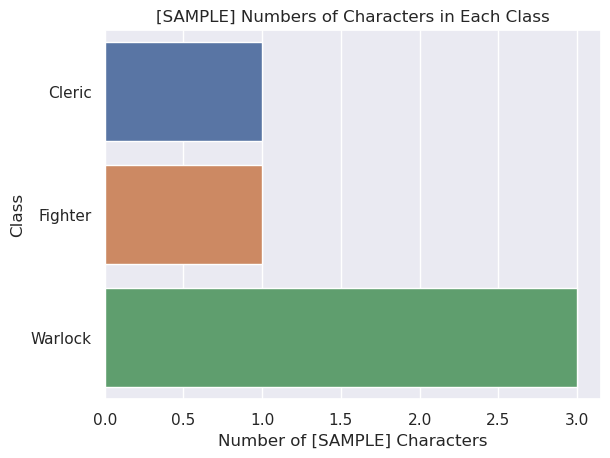

In [9]:
def count_plot(data: str, category: str, plot_title = "", x_label = "", y_label = ""):
    """
    Takes in a dataset, and returns the count of how often certain items
    are present within that category. Assumes that the path to the data
    is valid, and that the category name is valid. If no items are in
    the category, an empty plot is returned.
    Takes in three additonal strings that allow the user to customize
    the title and labels of the graph.
    If no values are specificied for the names, they are left blank.
    Accounts for the "justClass" token splitting, if applicable.
    """
    
    if category == "justClass":
        data[category] = data[category].str.split("|").str[0]
        data = data[data[category] != "Revised Ranger"]

    #to find lowest & highest values associated with category keys
    counts_dict = data[category].value_counts().to_dict()
    max_key = max(counts_dict, key = counts_dict.get)
    min_key = min(counts_dict, key = counts_dict.get)

    sorted_category = data[category].value_counts().sort_index()

    #coloring
    custom_palette = ["orange"] * len(sorted_category.index)
    custom_palette[sorted_category.index.get_loc(max_key)] = "dodgerblue"
    custom_palette[sorted_category.index.get_loc(min_key)] = "seagreen"
    
    plot = sns.barplot(x = sorted_category.values, y = sorted_category.index, 
                       hue = custom_palette, legend = False)
    plot.set(title = plot_title, xlabel = x_label, ylabel = y_label)
    
    return plot

#TESTING
sample_plot = count_plot(my_dnd_sample, "justClass", "[SAMPLE] Numbers of Characters in Each Class",
                   "Number of [SAMPLE] Characters", "Class")

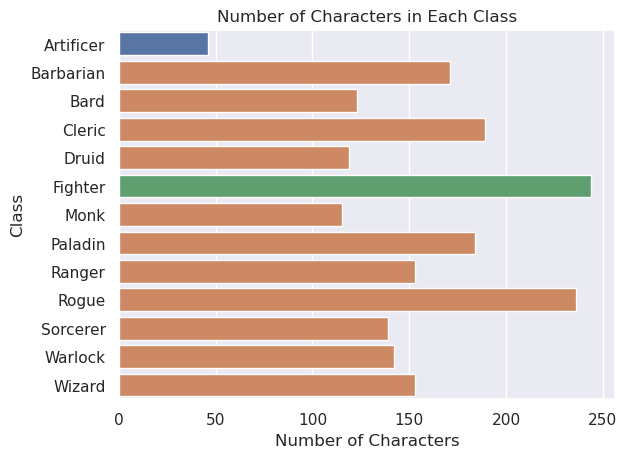

In [10]:
class_plot = count_plot(dnd_data, "justClass", "Number of Characters in Each Class",
                        "Number of Characters", "Class")

<Axes: title={'center': 'Number of Characters in Alignment'}, xlabel='Number of Characters', ylabel='Alignment'>

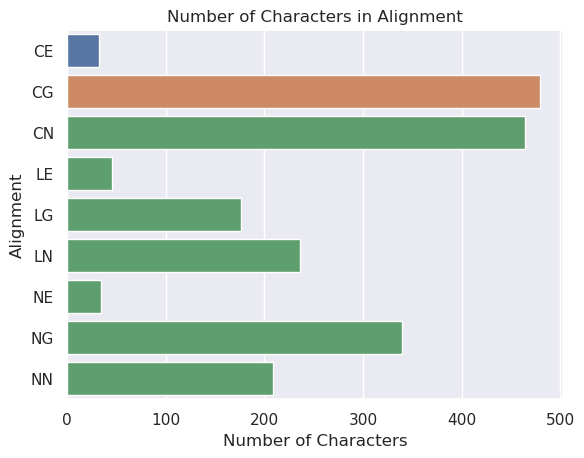

In [11]:
count_plot(dnd_data, "processedAlignment", "Number of Characters in Alignment",
                        "Number of Characters", "Alignment")

# RACE_OF_CLASS

The method race_of_class takes in a set of character data, a race the user wishes to explore, and a category within the set the user wishes to explore. It is designed to return a bar plot that visually displays the outcome of the counts of race per specified category.

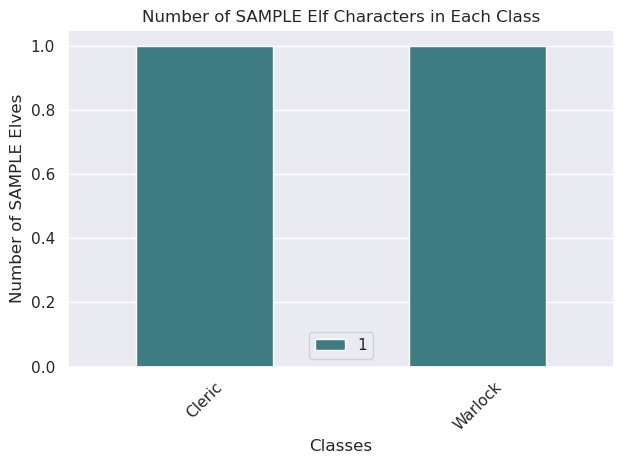

In [12]:
def race_of_class(data: str, race: str, category: str,
                  plot_title = "", x_label = "", y_label = ""):
    """
    Takes in a set of data, a race the user wishes to explore, and a class the user
    wishes to explore. Returns a bar graph of how many characters of a specified race
    belong to each class. If no classes are found to be associated with that race,
    the class column is left empty on the final return.
    Takes in three additonal strings that allow the user to customize
    the title and labels of the graph.
    If no values are specificied for the names, they are left blank.
    """
    
    race_data = data[data["race"] == race]
    counts = race_data[category].value_counts()
    
    bar_plot = sns.barplot(x = counts.index, y = counts.values, width = 0.5,
                          hue = counts.values, palette = "crest")
    
    bar_plot.set(title = plot_title, xlabel = x_label, ylabel = y_label)
    bar_plot = plt.xticks(rotation = 45)
    bar_plot = plt.tight_layout()  
    
    return bar_plot

#TESTING
race_of_class(my_dnd_sample, "Elf", "justClass", "Number of SAMPLE Elf Characters in Each Class",
              "Classes", "Number of SAMPLE Elves")

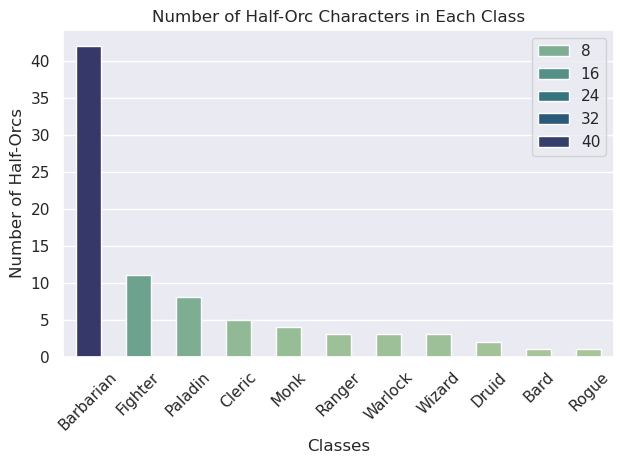

In [13]:
race_of_class(dnd_data, "Half-Orc", "justClass", "Number of Half-Orc Characters in Each Class",
              "Classes", "Number of Half-Orcs")

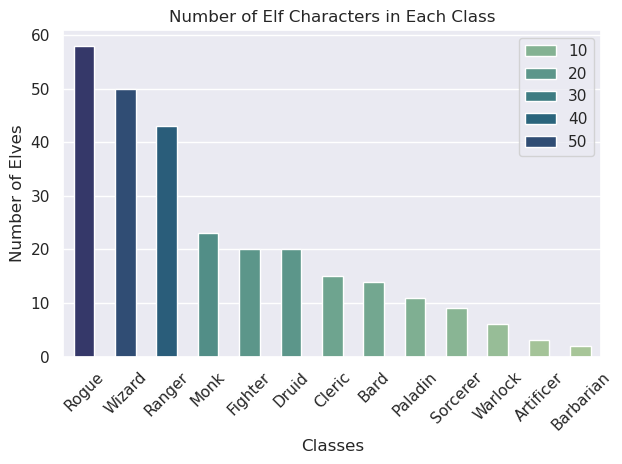

In [14]:
race_of_class(dnd_data, "Elf", "justClass", "Number of Elf Characters in Each Class",
              "Classes", "Number of Elves")

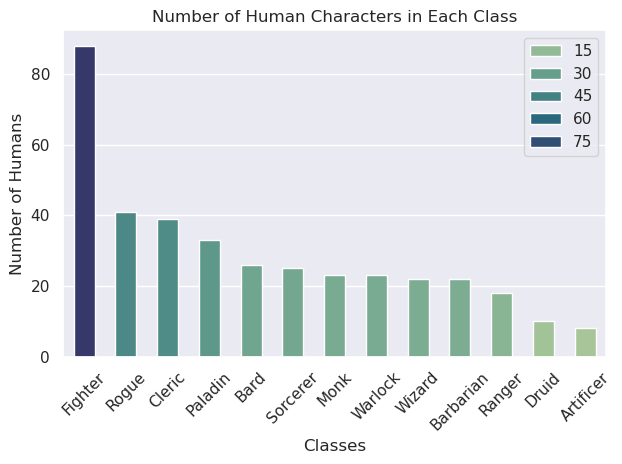

In [15]:
race_of_class(dnd_data, "Human", "justClass", "Number of Human Characters in Each Class",
              "Classes", "Number of Humans")

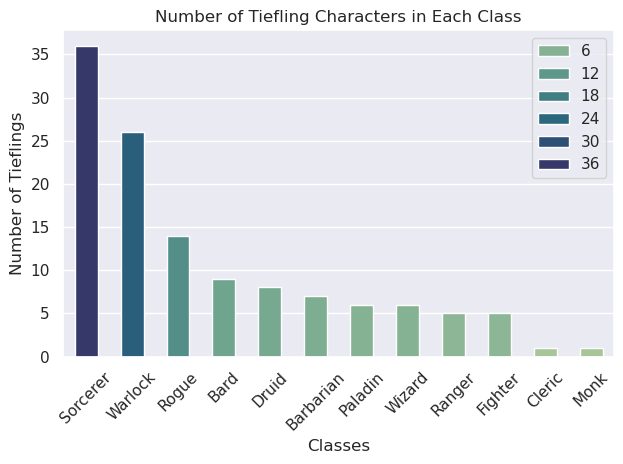

In [16]:
race_of_class(dnd_data, "Tiefling", "justClass", "Number of Tiefling Characters in Each Class",
              "Classes", "Number of Tieflings")

# Alignment Application of race_of_class

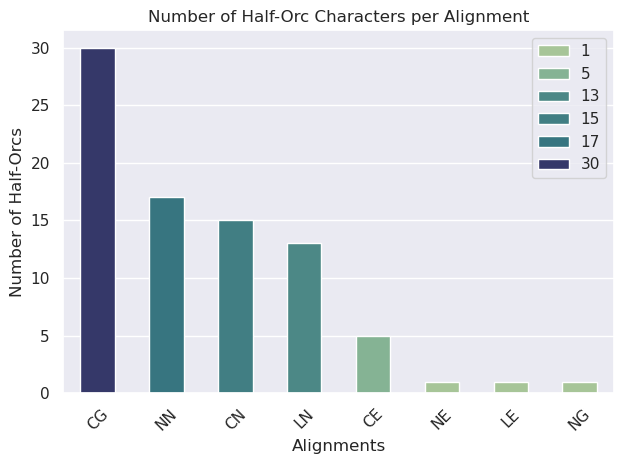

In [17]:
race_of_class(dnd_data, "Half-Orc", "processedAlignment", "Number of Half-Orc Characters per Alignment",
              "Alignments", "Number of Half-Orcs")

# Q2: CODE & RESULTS
### Inital Instructions: 

What are the race advantages and disadvantages imposed through the 6 main stats of D&D? 

### WRITE-UP
What affect does D&D 5E's pre-determined racial bonuses and proficienies have on the way players design their martial or spellcasting characters, and overall stat distribution?

5E's racial bonuses do determine the stat distribution for many of the characters included in this dataset, and additonally influences the kinds of classes players choose to play with certain races. To get specific, Half-Orcs are known for having a +2 modifer to their Strength and a +1 modifier to their Constituion stat simply for being a Half-Orc. Furthermore, the most common class for Half-Orc characters is Barbarian, which is a Strength-based class. It seems that players do pay attention to where bonuses are distributed when it comes to designing their characters, and do lean into pre-determined ways they can optimze their character builds for maximum damage output.

# STATS_PER_RACE

This method examines the average point scores assigned to each stat per specified race.

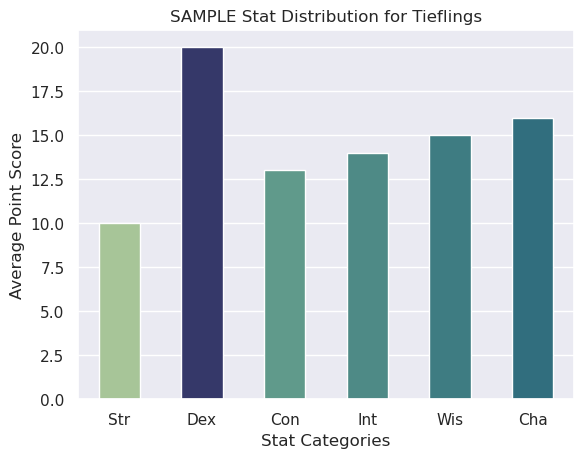

In [18]:
def stats_per_race(data: str, race: str, plot_title = "", x_label = "", y_label = ""):
    """
    Takes in a set of data and a character race the user wishes to analyze. Returns
    the most common stat distribution for that race using a bar plot.
    """

    race_data = data[data["race"] == race]
    stats = ["Str", "Dex", "Con", "Int", "Wis", "Cha"]

    stat_averages = {stat: np.mean(race_data[stat]) for stat in stats}

    sns.color_palette("crest")

    bar_plot = sns.barplot(x = stat_averages.keys(), y = stat_averages.values(), width = 0.5,
                          hue = stat_averages.values(), legend = False, palette = "crest")
    
    bar_plot.set(title = plot_title, xlabel = x_label, ylabel = y_label)
    
    return bar_plot

#TESTING
sample_plot = stats_per_race(my_dnd_sample, "Tiefling", "SAMPLE Stat Distribution for Tieflings", 
                             "Stat Categories", "Average Point Score")

<Axes: title={'center': 'Average Stat Distribution for Half-Orcs'}, xlabel='Stat Categories', ylabel='Average Point Score'>

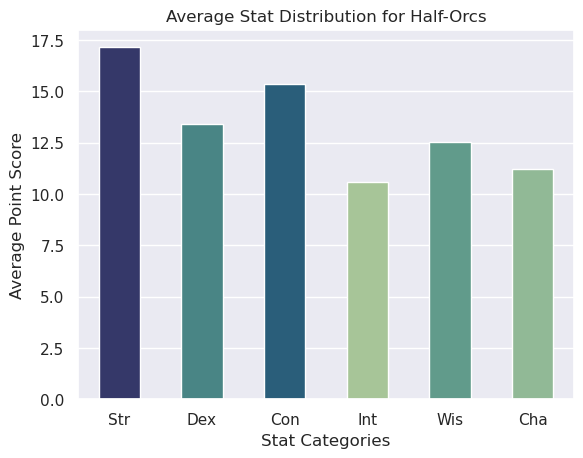

In [19]:
stats_per_race(dnd_data, "Half-Orc", "Average Stat Distribution for Half-Orcs", "Stat Categories", "Average Point Score")

<Axes: title={'center': 'Average Stat Distribution for Tieflings'}, xlabel='Stat Categories', ylabel='Average Point Score'>

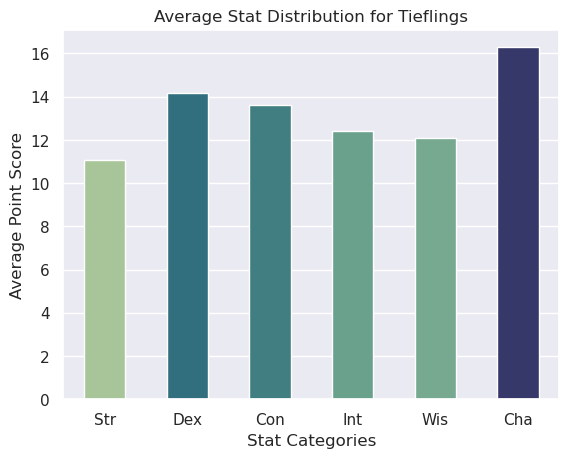

In [20]:
stats_per_race(dnd_data, "Tiefling", "Average Stat Distribution for Tieflings", "Stat Categories", "Average Point Score")

<Axes: title={'center': 'Average Stat Distribution for Elves'}, xlabel='Stat Categories', ylabel='Average Point Score'>

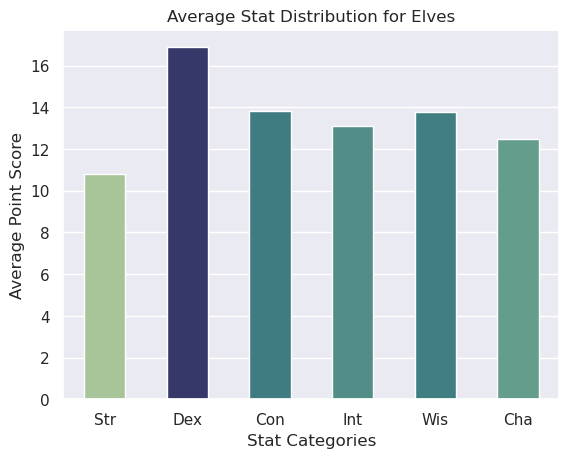

In [21]:
stats_per_race(dnd_data, "Elf", "Average Stat Distribution for Elves", "Stat Categories", "Average Point Score")

<Axes: title={'center': 'Average Stat Distribution for Humans'}, xlabel='Stat Categories', ylabel='Average Point Score'>

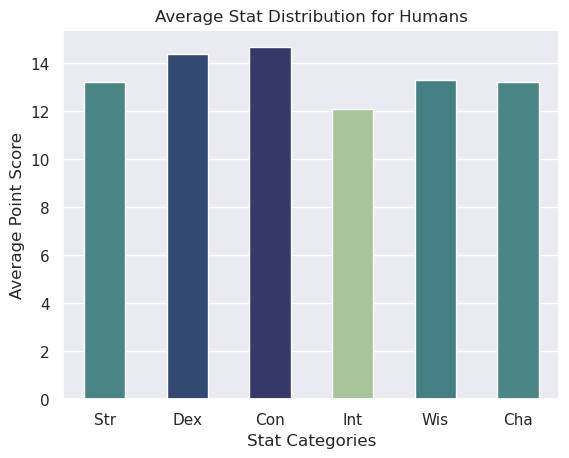

In [22]:
stats_per_race(dnd_data, "Human", "Average Stat Distribution for Humans", "Stat Categories", "Average Point Score")

## New Library Implementation (Challenge Goal 2)
The following cell implements a new library that has not been covered in class. The library is altair, and it is used for data visualization.


# Q3: CODE & RESULTS
### Inital Instructions: 
In this dataset, how many characters exist per level? Per country, find how many characters are of certain levels.

### WRITE-UP
In this dataset, how many characters exist per level? What does this imply about the longevity of a character and/or D&D 5E campaign, if it implies anything at all? Why might it imply something, why might it not imply something? Per country, find how many characters are of certain levels. Why might level thresholds differ over regions?

In this dataset, the country with the most level 1 characters is the United States with 239 level one characters. This implies that, according to this data, the United States is creating the most characters, either used or unused, and that D&D 5E is very popular in the United States as level one characters are only created at the start of 5E campaigns. This trend seems to be consistent among all countries--the number of lower-level characters, or characters who are level 1-5, far exceeds any other level group of characters. This is because, as 5E is gaining popularity, older characters, or higher-leveled characters which take time to achieve, are becoming less common in terms of frequency. More campaigns are being started overall, and so the lower-level characeters are saturating the information. This does not mean that higher-level charcaters don't exist, only that, proportional to the new characters, they are made and/or achieved in far fewer cases.

# COUNTRY_PER_LEVEL


In [23]:
def country_per_level(data: str, country: str):
    """
    This method takes in a path to a dataset of D&D 5e characters 
    and returns a plot that displays how many D&D characters per level
    exist in different categories. Country must be in countryCode format.
    """

    country_data = data[data["countryCode"] == country]
    levels = data["level"].unique()

    chart = alt.Chart(data).mark_circle(size = 200).encode(
        x = alt.X("level", title = "Character Level", scale = alt.Scale(domain=[0, 20])),
        y = alt.Y("count()", title = "Number of Characters", scale = alt.Scale(zero = False)),
        color = alt.condition(alt.datum.countryCode == country, alt.value("red"), alt.value("gray")),
        tooltip = ["level", "countryCode", "count()"] 
    ).properties(
        title = "D&D Characters per Level in " + country
    ).interactive()
    
    return chart

#TESTING
country_per_level(my_dnd_sample, "US")

alt.Chart(...)

In [24]:
country_per_level(dnd_data, "US")

alt.Chart(...)

In [30]:
country_per_level(dnd_data, "AU")

alt.Chart(...)

In [26]:
country_per_level(dnd_data, "CA")

alt.Chart(...)

## Final Results

### Q.1) Why might players be drawn to this specific kind of character archetype, and what does this mean for the general themes surrounding D&D 5E? (Is this archetype popular because it is “familiar” or “unfamiliar?”)

Human characters are the most popular kind of characters in 5E. Although, from the information gathered here, it is difficult to glean who is playing human characters (in terms of age range, gender, etc), humans may be the most popular characters in 5E because their flexibility. 5E has a feature called "racial bonuses," and many races, like Half-Orcs and Elves, have their racial bonuses set up so they affect a specific stat. For example, a Half-Orc character, upon selecting the race Half-Orc, will immediately be given a +2 bonus to their Strength stat and a +1 bonus to their Constituion stat. Humans, however, have flexible race bonuses, in that players can choose which stats they wish to modify with their two bonuses freely.


### Q.2) What affect does D&D 5E's pre-determined racial bonuses and proficienies have on the way players design their martial or spellcasting characters, and overall stat distribution?

5E's racial bonuses do determine the stat distribution for many of the characters included in this dataset, and additonally influences the kinds of classes players choose to play with certain races. To get specific, Half-Orcs are known for having a +2 modifer to their Strength and a +1 modifier to their Constituion stat simply for being a Half-Orc. Furthermore, the most common class for Half-Orc characters is Barbarian, which is a Strength-based class. It seems that players do pay attention to where bonuses are distributed when it comes to designing their characters, and do lean into pre-determined ways they can optimze their character builds for maximum damage output.


### Q.3) In this dataset, how many characters exist per level? What does this imply about the longevity of a character and/or D&D 5E campaign, if it implies anything at all? Why might it imply something, why might it not imply something? Per country, find how many characters are of certain levels. Why might level thresholds differ over regions?

In this dataset, the country with the most level 1 characters is the United States with 239 level one characters. This implies that, according to this data, the United States is creating the most characters, either used or unused, and that D&D 5E is very popular in the United States as level one characters are only created at the start of 5E campaigns. This trend seems to be consistent among all countries--the number of lower-level characters, or characters who are level 1-5, far exceeds any other level group of characters. This is because, as 5E is gaining popularity, older characters, or higher-leveled characters which take time to achieve, are becoming less common in terms of frequency. More campaigns are being started overall, and so the lower-level characeters are saturating the information. This does not mean that higher-level charcaters don't exist, only that, proportional to the new characters, they are made and/or achieved in far fewer cases.



## Limitations

I. This study has some limitations because u/mouse_Brains' has transcribed their information in English and likely collected their responses with an English survey. This implictly adds bias to English speakers and does not take into account the D&D 5E characters who might've been made by non-English speakers.

II. This data has no information regarding player age. Because of this, it is hard to completely understand when character creation trends happened. We can only understand the all-time theme, which may be biased in that this survey was collected through Reddit, an online forum used by younger people.

III. This data does take into account characters that have been multi-classed, but it does not do so in a comprehensive fashion (like listing how many levels have been put into each class). This makes examining multi-classed characters difficult, and makes examining the most common ratio for multi-classed characters impossible.

## Implications

The most common D&D 5E character is a Human Fighter. By knowing this, myself and other D&D players can examine why we are so comfortable with playing Human Fighters, and how we might reach out in the future to play other archetypes!